<a href="https://colab.research.google.com/github/nadiya-k-a/Students-Performance-Analysis/blob/main/NADIYA_ANALYSIS_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***ANALYSIS ON THE TITANIC DATA SET --- DATA PREPROCESSING***







In [90]:
##IMPORTING NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## **LOAD THE DATASET INTO PYTHON ENVIRONMENT**

In [91]:
##Read Data
data = pd.read_csv('/content/titanic-dataset.csv')

In [92]:
##Printing first five rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **MAKE 'PASSENGERID' AS THE INDEX COLUMN**

In [93]:
data  =data.set_index('PassengerId')

In [94]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# **Check the basic details of the dataset**

In [95]:
##Checking for null values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [96]:
##Information about data frame,column size, and file size
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### *Now we know there are 7 numerical columns,5 non-numerical columns, and their name as well.The output also tell us that there are 891 entries and 12 columns*

In [97]:
##Generate summary statistics for each numerical column of the data frame
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
##To check unique values in each column of the dataframe

data.nunique() 


Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [99]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# **Fill in all the missing values present in all the columns in the dataset**

Text(0.5, 1.0, 'Missing values')

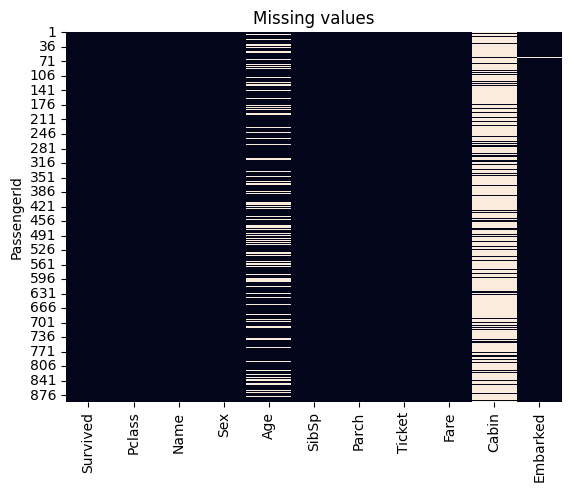

In [100]:
sns.heatmap(data.isnull(),cbar = False).set_title('Missing values')

### *From above heat map we can see that values are missing at random. we can use either mean or median to fill the null values* 

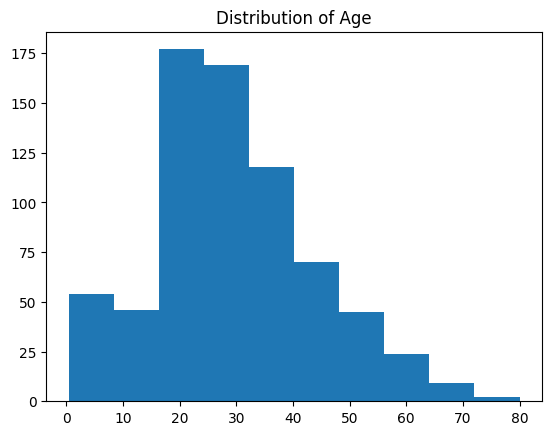

In [101]:
plt.hist(data['Age'])
plt.title('Distribution of Age')
plt.show()

## *Since the distribution is skewed,median can be used to fill null values*

In [102]:
##filling null values using median
data['Age'] = data['Age'].fillna(data['Age'].median())

##Checking for null values in column Age
data['Age'].isna().sum()

0

In [103]:
##Since columns Embarked,Cabins are categorical it can be filled with mode

data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

data['Embarked'].isna().sum()


0

In [104]:
data['Cabin'].fillna(data['Cabin'].mode()[0],inplace=True)

##Checking output
data['Cabin'].isna().sum()


0

# **Check and handle outliers in at least 3 columns in the dataset**


## ***Outliers--- Fare***

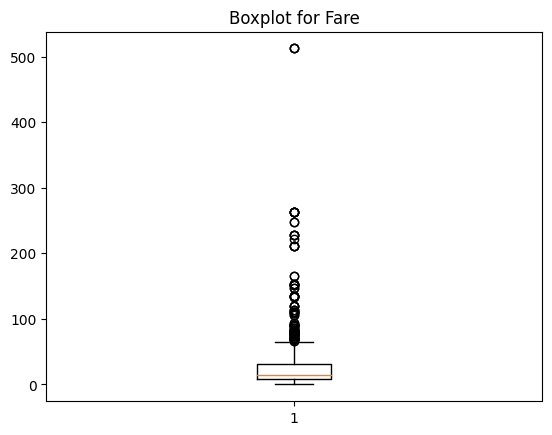

In [105]:
##To detect outliers we use boxplot visualisation technique
plt.boxplot(data['Fare'])
plt.title('Boxplot for Fare')
plt.show()

In [106]:
## calculating percentiles
Q1=np.percentile(data['Fare'],25)
Q2=np.percentile(data['Fare'],50)
Q3=np.percentile(data['Fare'],75)
IQR =Q3-Q1
low_limit_for_fare=Q1-1.5*IQR
upper_limit_for_fare=Q3+1.5*IQR
print(f"Lower Limit for Fare:{low_limit_for_fare}")
print(f"Upper Limit for Fare:{upper_limit_for_fare}")

Lower Limit for Fare:-26.724
Upper Limit for Fare:65.6344


In [107]:
outlier_fare = []
for  i in data['Fare']:
  if i > upper_limit_for_fare or i<low_limit_for_fare:
    outlier_fare.append(i)

In [108]:
outlier_fare

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [109]:
ind = data['Fare']>upper_limit_for_fare
df = data.loc[ind].index

In [110]:
data.drop(df,inplace = True)

In [111]:
data.shape

(775, 11)

## ***Otliers --- SibSP***

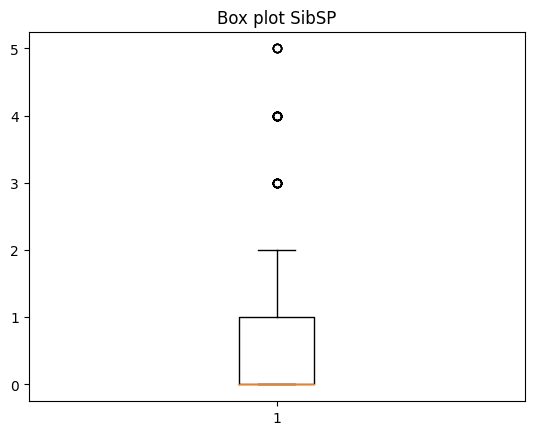

In [112]:
##Boxplot for SibSp

plt.boxplot(data['SibSp'])
plt.title('Box plot SibSP')
plt.show()

In [113]:
Q1=np.percentile(data['SibSp'],25)
Q2=np.percentile(data['SibSp'],50)
Q3=np.percentile(data['SibSp'],75)
IQR =Q3-Q1
low_limit_sibsp = Q1-1.5*IQR
upper_limit_sibsp = Q3+1.5*IQR
print(f"Lower Limit for SibSp:{low_limit_sibsp}")
print(f"Upper Limit for SibSp:{upper_limit_sibsp}")

Lower Limit for SibSp:-1.5
Upper Limit for SibSp:2.5


In [114]:
outlier_sibsp = []
for i in data['SibSp']:
  if i > upper_limit_sibsp or i<low_limit_sibsp:
    outlier_sibsp.append(i)


In [115]:
outlier_sibsp

[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 4]

In [116]:
ind1 = data['SibSp']>upper_limit_sibsp
df2 = data.loc[ind1].index
data.drop(df2,inplace = True)

In [117]:
data.shape

(739, 11)

## *We removed the outliers in SibSp column.*

## ***Outliers --- Age***

<function matplotlib.pyplot.show(close=None, block=None)>

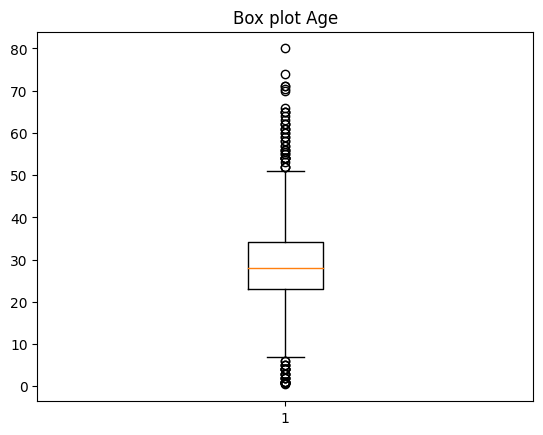

In [118]:
plt.boxplot(data['Age'])
plt.title('Box plot Age')
plt.show

In [119]:
Q1=np.percentile(data['Age'],25)
Q2=np.percentile(data['Age'],50)
Q3=np.percentile(data['Age'],75)
IQR =Q3-Q1
low_limit_Age = Q1-1.5*IQR
upper_limit_Age = Q3+1.5*IQR
print(f'Lower Limit for Age:{low_limit_Age}')
print(f'Upper Limit for Age:{upper_limit_Age}')

Lower Limit for Age:6.125
Upper Limit for Age:51.125


In [120]:
outlier_age=[]
for x in data['Age']:
    if x<=low_limit_Age or x>=upper_limit_Age:
        outlier_age.append(x)

In [121]:
len(outlier_age)

72

In [122]:
ind2 = (data['Age']< low_limit_Age) + (data['Age']>upper_limit_Age)

In [123]:
ind2

PassengerId
1      False
3      False
4      False
5      False
6      False
       ...  
887    False
888    False
889    False
890    False
891    False
Name: Age, Length: 739, dtype: bool

In [124]:
df2 = data.loc[ind2].index
len(df2)

72

In [125]:
data.drop(df2,inplace = True)
data.shape

(667, 11)

# **Do min max scaling on the feature set (Take ‘Survived’ as target)**

In [130]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q


In [131]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [135]:
data2 = data.drop(['Name','Ticket'],axis = 1)

In [141]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [144]:
data2['Sex'] = le.fit_transform(data2['Sex'])

In [146]:
data2['Cabin'] = le.fit_transform(data2['Cabin'])

In [148]:
data2['Embarked'] = le.fit_transform(data2['Embarked'])

In [166]:
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,21,2
3,1,3,0,26.0,0,0,7.9250,21,2
4,1,1,0,35.0,1,0,53.1000,26,2
5,0,3,1,35.0,0,0,8.0500,21,2
6,0,3,1,28.0,0,0,8.4583,21,1


In [167]:

x = data2.drop('Survived',axis = 1) 
y = data2['Survived'] ##Target variable

In [168]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range =(0,1))
x2 = mm.fit_transform(x)

In [154]:
type(x2)

numpy.ndarray

In [169]:
x2 = pd.DataFrame(x2,columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'])

In [170]:
x2.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,0.751124,0.694153,0.497887,0.129685,0.042729,0.253975,0.331870,0.797601
std,0.361816,0.461111,0.192954,0.243634,0.125089,0.205045,0.133738,0.368986
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.386364,0.000000,0.000000,0.120834,0.300000,0.500000
50%,1.000000,1.000000,0.477273,0.000000,0.000000,0.161538,0.300000,1.000000
75%,1.000000,1.000000,0.590909,0.000000,0.000000,0.357692,0.300000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [158]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [172]:
data3  = pd.concat([y,x2],axis = 1)
data3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,0.0,1.0,0.0,0.431818,0.0,0.000000,0.121923,0.3,1.0
3,1.0,1.0,1.0,0.636364,0.0,0.000000,0.123846,0.3,1.0
4,1.0,1.0,1.0,0.477273,0.0,0.000000,0.130128,0.3,0.5
5,0.0,1.0,0.0,0.454545,0.0,0.333333,0.171282,0.3,1.0
6,0.0,0.5,0.0,0.159091,0.5,0.000000,0.462628,0.3,0.0
